# Natural Language Processing Project

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports
 **Import the usual suspects. :) **

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import string

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**I create a new column called "text_length" which is the number of words in the text column.**

In [14]:
yelp['text_length'] = yelp ['text'].apply(lambda x:len(x))
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

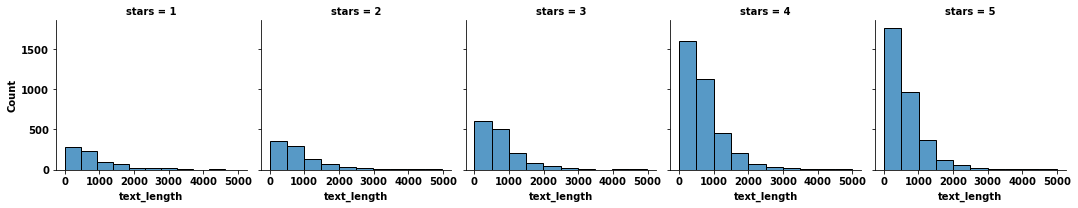

In [24]:
fig = sns.FacetGrid(data=yelp, col="stars")
fig.map (sns.histplot, 'text_length', bins = 10);

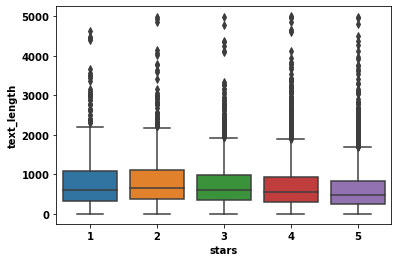

In [26]:
sns.boxplot(data = yelp, x = 'stars', y = 'text_length');

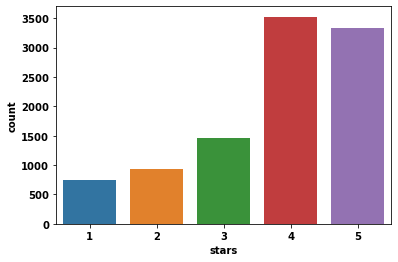

In [28]:
sns.countplot(data = yelp , x = 'stars');

In [30]:
yelp.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [31]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

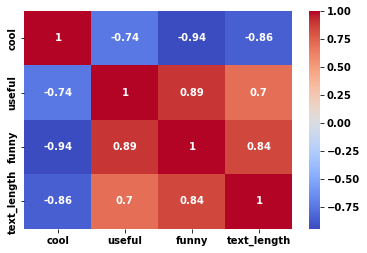

In [39]:
sns.color_palette("deep")
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',annot=True)

## NLP Classification Task


**First, I create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [44]:
yelp_class = yelp[(yelp ['stars'] == 5) | (yelp ['stars'] == 1)]

In [58]:
X = yelp_class ['text']
y = yelp_class ['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model


In [77]:
nb = MultinomialNB()

In [78]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations


In [79]:
prediction = nb.predict(X_test)


In [82]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing


**We create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [85]:
pipeline = Pipeline([
    ('vectorized',CountVectorizer()),
    ('text_processing', TfidfTransformer()),
    ('classifiers',MultinomialNB())
    
])

## Using the Pipeline

**I need to re-split the original data (Remember that we overwrote X as the CountVectorized version). What we need is just the text**

### Redo Train Test Split

In [94]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorized', CountVectorizer()),
                ('text_processing', TfidfTransformer()),
                ('classifiers', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [100]:
prediction = pipeline.predict(X_test)

In [103]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))


[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\hamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! 


I am changing the ML model (to RandomForest) to see if it helps at all.

In [109]:
pipeline = Pipeline([
    ('vectorized',CountVectorizer()),
    ('text_processing', TfidfTransformer()),
    ('classifiers',RandomForestClassifier())
    
])
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[ 51 177]
 [  1 997]]


              precision    recall  f1-score   support

           1       0.98      0.22      0.36       228
           5       0.85      1.00      0.92       998

    accuracy                           0.85      1226
   macro avg       0.92      0.61      0.64      1226
weighted avg       0.87      0.85      0.82      1226



That makes things much better but we are still not even as good as the case when we did not use tf idf

We still can work on this by introudcing a function for text processing. The function is able to remove the punctuation and stopWords and just return a list of clean words

In [113]:
def text_process (mess):
    """
    1. Remove Punctuation 
    2. Remove StopWords
    3. Return List of Clean Text
    """
    return [word.lower() for word in ''.join([c for c in mess if c not in string.punctuation]).split() if word.lower() not in stopwords.words('english')]

In [114]:
pipeline = Pipeline([
    ('vectorized',CountVectorizer(analyzer=text_process)),
    ('text_processing', TfidfTransformer()),
    ('classifiers',RandomForestClassifier())
    
])
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[ 79 149]
 [  4 994]]


              precision    recall  f1-score   support

           1       0.95      0.35      0.51       228
           5       0.87      1.00      0.93       998

    accuracy                           0.88      1226
   macro avg       0.91      0.67      0.72      1226
weighted avg       0.88      0.88      0.85      1226



**Interestingly, we  can see an improvement by introudcing text_processing**

One more thing we can do is we change sublinear_tf to true, which replaces tf with 1 + log(tf). This addresses the issue that “twenty occurrences of a term in a document” does not represent “twenty times the significance of a single occurrence” [(this link)](https://towardsdatascience.com/training-a-naive-bayes-model-to-identify-the-author-of-an-email-or-document-17dc85fa630a). Therefore, it reduces the importance of high frequency words (for example, **that 1+log(1) = 1, while 1+log(20) = 2.3**).

In [115]:
pipeline = Pipeline([
    ('vectorized',CountVectorizer(analyzer=text_process)),
    ('text_processing', TfidfTransformer(sublinear_tf=True)),
    ('classifiers',RandomForestClassifier())
    
])
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[ 73 155]
 [  3 995]]


              precision    recall  f1-score   support

           1       0.96      0.32      0.48       228
           5       0.87      1.00      0.93       998

    accuracy                           0.87      1226
   macro avg       0.91      0.66      0.70      1226
weighted avg       0.88      0.87      0.84      1226



This did not change that much.